# **Heart rate estimation project**
### by Erica Brisigotti, Ekaterina Chueva, Maximilian Peter, Nadillia Saphutra

## 0. **Introduction**
[THIS PART MUST BE CHANGED AND INTEGRATED WITH DETAILS ABOUT HEART RATE AND CYCLE, SCG AND BCG, AND WITH ALL THE THEORETICAL INFO THAT WE'RE USING TO MAKE INFORMED DECISIONS LATER IN THE ANALYSIS PART]

Seismocardiography([SCG](https://www.ncbi.nlm.nih.gov/pubmed/24111357)) is a very promising technique to measure Heart Rate (HR) and Respiratory Rate (RR) with the detector positioned above sternum. It is generally based on accelerometer and gyroscope readings or a combination of them. 

Ballistocardiography([BCG](https://en.wikipedia.org/wiki/Ballistocardiography)) is an another technique to estimate heart and respiratory rate with combination of both accelerometer and gyroscope. It is an indirect evaluation of HR and RR since the contact between the device and the body of the subject is not required (e.g., accelerometer platform mounted under the slats of the bed).   
  
MuSe(Multi-Sensor miniaturized, low-power, wireless [IMU](https://en.wikipedia.org/wiki/Inertial_measurement_unit)) is an Inertial Measurement Unit (IMU) provide by [221e](https://www.221e.com). In the context of this project, It allows to record the inertial data necessary for the estimation of SCG and BCG.

The goal of this assignment is to estimate the heart rate of an healthy subject, given linear acceleration and angular velocity measurements recorded by using the aforementioned MuSe platform. 
The study must be performed on two datasets: the first is the compulsory one (**center_sternum.txt**) while the second is left at the discretion of the group, among those made available for the assignment.

**N.B: Remember that normal beat is around [40-100] bpm.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. **Data preparation**

### 1.1. Load the txt file and select only the columns you are interesting in, in order to do a complete data analysis (e.g. Log Freq, AccX, ... )

Even before uploading the data, it is well-known that there are 16 columns with different meanings. Specifically:
* **Log Freq** stands for the acquisition  in Hz (i.e., sampling interval is constant).
* **AccX, AccY, AccZ** are the measured magnitude of linear acceleration along each axis.
* **GyroX, GyroY, GyroZ** are the measured magnitude of angular velocity along each axis.
* **MagnX, MagnY, MagnZ** are the measured magnitude of magnetic field along each axis.
* **qw, qi, qj, qk** are the quaternion components, representing the spatial orientation of the Muse system.

Further *a priori* information follows from the theoretical information (previously explained in the introduction) about the techniques to be implemented: SCG and BCG. Both of these strategies analyse the evolution in time of accelleration and angular momentum. Therere, only accelerometer, gyrometer and time information will be neede. The other physical quantities can be discarded.

Such statements are supported by the data, which is uploaded (as a Pandas' dataframe) and statistically analyzed through the appropriate Pandas' built-in function (<code>pandas.describe</code>).

In [2]:
file_name = 'center_sternum.txt'
just_uploaded = pd.read_csv(file_name, delimiter='\t')
all_data = pd.DataFrame(just_uploaded)
display(all_data)
all_data.describe()

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
count,16506.0,16506.0,1.650600e+04,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000
mean,5.0,200.0,1.576223e+09,35.603752,121.754422,-897.001465,-1.885665,3.636535,-0.818354,-231.327881,-432.637405,397.903005,0.063803,0.490530,-0.764329,-0.039947
std,0.0,0.0,2.189258e+01,232.624330,62.077114,215.230574,13.223364,17.399954,10.595643,67.200320,16.526077,123.871453,0.144073,0.197328,0.326346,0.057694
min,5.0,200.0,1.576223e+09,-722.118000,-387.838000,-1731.973000,-359.496200,-213.557300,-126.351100,-511.000000,-559.000000,-178.000000,0.004428,-0.622059,-0.892911,-0.096347
25%,5.0,200.0,1.576223e+09,-35.258000,111.020000,-958.310000,-2.839695,3.206107,-1.175573,-213.000000,-434.000000,427.000000,0.021518,0.493858,-0.859676,-0.060732
50%,5.0,200.0,1.576223e+09,-29.585000,115.900000,-948.733000,-2.137405,3.664122,-0.854962,-212.000000,-432.000000,429.000000,0.024636,0.529649,-0.836619,-0.059511
75%,5.0,200.0,1.576223e+09,-22.692000,120.475000,-937.692000,-1.206107,4.213740,-0.549618,-211.000000,-431.000000,433.000000,0.027304,0.564768,-0.813227,-0.057619
max,5.0,200.0,1.576223e+09,1228.601000,1004.609000,3087.000000,381.160300,349.816800,187.603100,-130.000000,-289.000000,481.000000,0.792622,0.624806,0.921293,0.251900


In [3]:
# timestamp have repetitive values that may represent a meaningful division of the data, but there's no info that supports it

The brief descriptive statistics provided by the <code>pandas.describe</code> function are particularly helpful in getting the time at which every measurement has been taken.
The **Log Freq** data, which represents the acquisition rate (in Hz), is constant and therefore allows for straigh-forward identification of the time interval between two successive measurements:

In [4]:
frq = all_data['Log Freq'].unique()[0]
time = np.arange(0,(len(all_data.index)/frq),(1/frq))

All unnecessary columns can now be dropped and a new one can be added to store the corresponding values of time.

In [6]:
data = all_data.drop(['MagnX','MagnY','MagnZ','qw','qi','qj','qk','Log Mode','Log Freq','Timestamp'], axis = 1)
data.insert(0, "Time", time)
data

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.000,947.086,435.662,70.638,-6.824428,-14.244280,1.404580
1,0.005,969.168,387.777,88.877,6.183206,-12.290080,-7.969466
2,0.010,989.603,380.335,78.751,11.709920,-4.961832,-7.450382
3,0.015,954.894,418.033,88.328,17.877860,2.519084,-5.984733
4,0.020,972.096,427.732,99.857,25.221370,5.404580,4.015267
...,...,...,...,...,...,...,...
16501,82.505,958.493,291.092,-54.290,1.664122,2.305344,-0.671756
16502,82.510,954.650,288.042,-49.654,1.480916,2.488550,-0.702290
16503,82.515,967.338,290.482,-63.867,1.114504,3.374046,-0.900763
16504,82.520,965.630,300.852,-56.242,0.702290,3.664122,-1.587786


## 1.2. Plot selected data in function of time and choose a properly time window over which to perform the analysis. Pay attention on time rappresentation and the measurament unit.

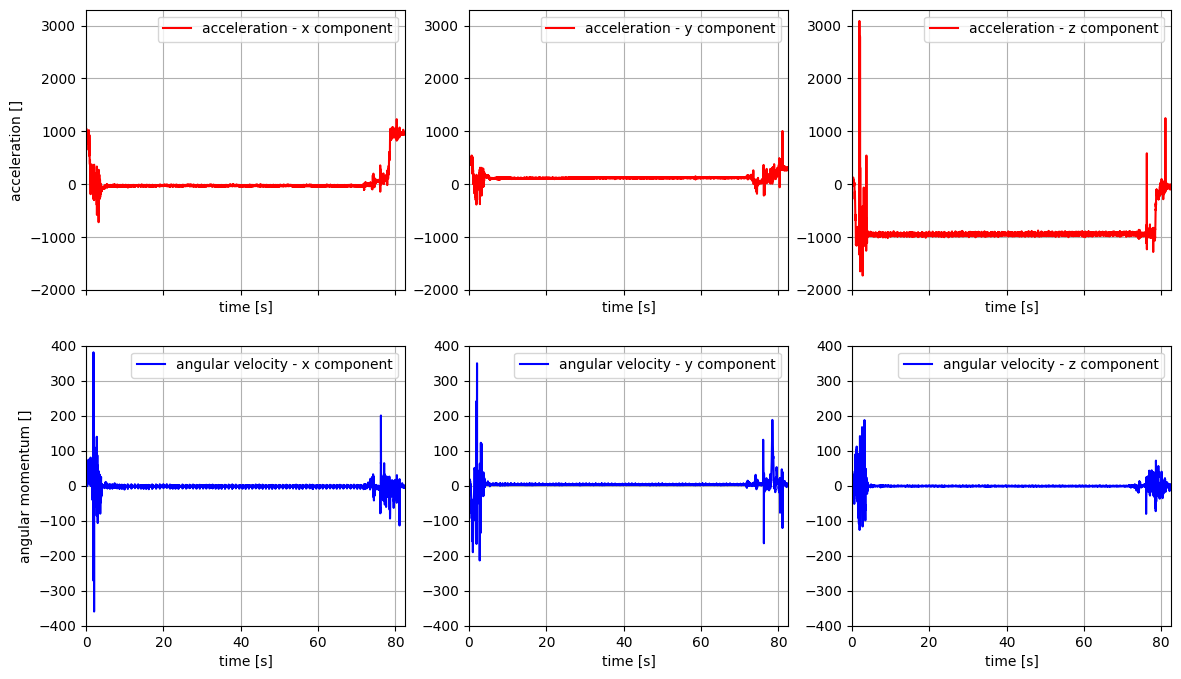

In [16]:
fig1,ax1 = plt.subplots(nrows=2,ncols=3,sharex=True,figsize=(14,8))

ax1[0][0].plot(data['Time'],data['AccX'],'-r',label='acceleration - x component')
ax1[0][0].set_xlim(0,data['Time'].max())
ax1[0][0].set_ylim(-2000,3300)
ax1[0][0].set_xlabel('time [s]')
ax1[0][0].set_ylabel('acceleration []')
ax1[0][0].legend()
ax1[0][0].grid()

ax1[0][1].plot(data['Time'],data['AccY'],'-r',label='acceleration - y component')
ax1[0][1].set_xlim(0,data['Time'].max())
ax1[0][1].set_ylim(-2000,3300)
ax1[0][1].set_xlabel('time [s]')
ax1[0][1].legend()
ax1[0][1].grid()

ax1[0][2].plot(data['Time'],data['AccZ'],'-r',label='acceleration - z component')
ax1[0][2].set_xlim(0,data['Time'].max())
ax1[0][2].set_ylim(-2000,3300)
ax1[0][2].set_xlabel('time [s]')
ax1[0][2].legend()
ax1[0][2].grid()

ax1[1][0].plot(data['Time'],data['GyroX'],'-b',label='angular velocity - x component')
ax1[1][0].set_xlim(0,data['Time'].max())
ax1[1][0].set_ylim(-400,400)
ax1[1][0].set_xlabel('time [s]')
ax1[1][0].set_ylabel('angular momentum []')
ax1[1][0].legend()
ax1[1][0].grid()

ax1[1][1].plot(data['Time'],data['GyroY'],'-b',label='angular velocity - y component')
ax1[1][1].set_xlim(0,data['Time'].max())
ax1[1][1].set_ylim(-400,400)
ax1[1][1].set_xlabel('time [s]')
ax1[1][1].legend()
ax1[1][1].grid()

ax1[1][2].plot(data['Time'],data['GyroZ'],'-b',label='angular velocity - z component')
ax1[1][2].set_xlim(0,data['Time'].max())
ax1[1][2].set_ylim(-400,400)
ax1[1][2].set_xlabel('time [s]')
ax1[1][2].legend()
ax1[1][2].grid()


A few observations come up from a general graphical representation of the remaining data:
- all measurements have a similar behaviour, which consists of small obscillations around an offset (which varies within measurements) for the majority of time and some larger fluctuations at the beginning and end
- supposing that the larger fluctuations were caused by the heartbeat, it follows that the patient's heart wouldn't beat for over a minute (he would be dead) which is paradoxical: it follows that the interesting, heart-related information will be contained in the innermost, small obscillating portion of each set of measurement
- the larger fluctuations at the beginning and at the end of each measurement set are therefore regarded as anomalies, possibly due to the patient positioning himself or the devices being set up for the measurements

A more quantitative approach to the selection of the appropriate time window will be taken up after a quick visual representation of the correlation between the components of each type of measurement.

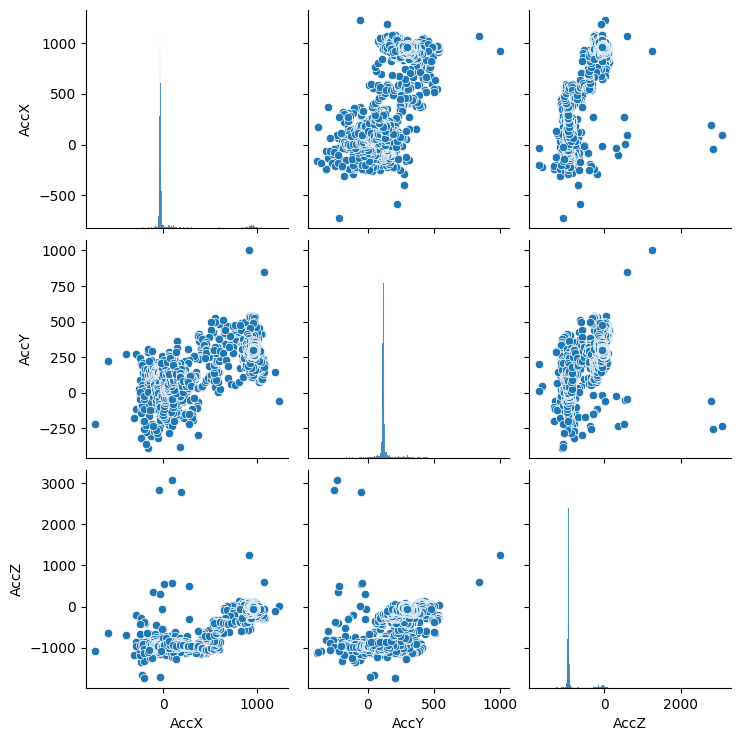

In [13]:
sns.pairplot(data,vars=['AccX','AccY','AccZ'])

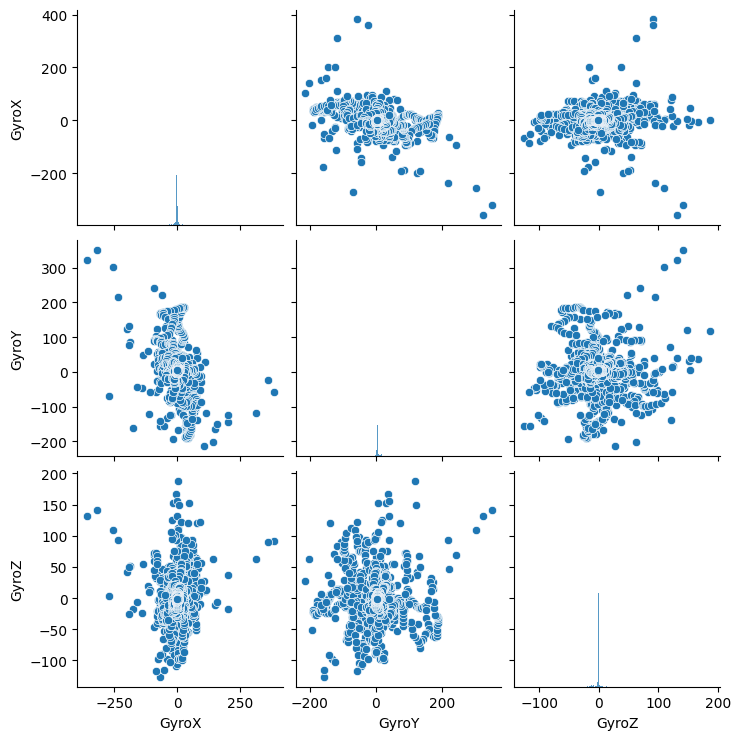

In [14]:
sns.pairplot(data,vars=['GyroX','GyroY','GyroZ'])

In [ ]:
# test code
# # df.loc[:,['A','B']]
# aa = mat_supine.loc[:,['Log Freq','AccX']]
# display(aa)

# # df.drop(['E prime'], axis=1)

# bb = mat_supine.drop(['Log Freq'], axis = 1)
# display(bb)

#len(center_sternum_d.index)

In [ ]:
# timestamp mattress 
#mat_supine.Timestamp.unique()

In [ ]:
#mat_supine.Timestamp.value_counts()

### 1.3. In order to make an appropiate work, decide if take care about some particular axis or some combination of them as well as derived features for the next step of the task. Motivate your choice.

1.3
- to decide which axis and info to keep analysing, perform a PCA (since the professor is speaking about combinations of the components, what about considering spherical coordinates?)

2.1
- statistical description of data
- FFT

In [ ]:
#doing the same for mattress data

frq = mat_supine['Log Freq'].unique()[0]

ms = mat_supine.drop(['MagnX','MagnY','MagnZ','qw','qi','qj','qk','Log Mode','Log Freq','Timestamp'], axis = 1)
# display(center_sternum_d)
ms.head(5)
ms.insert(0, "Time", np.arange(0,(len(ms.index)/frq),(1/frq)))
ms

# Adding offsets, plotting data, dropping some data

Please add here ok cells of work before so it will be not messy now

In [ ]:
########24.01.22 upd

###PREVIOUSLY NO COMSIDERATION OF OFFSETS
#added here to accelerometer 


### center sternum README1
acc_offsets1 = np.array([-3.929942, -13.74679, 60.67546])

cs = center_sternum_d
cs['AccX'] += acc_offsets1[0]
cs['AccY'] += acc_offsets1[1]
cs['AccZ'] += acc_offsets1[2]

In [ ]:
# alternative ways of selecting data based on histogram counts are inspired by the following link:
# https://stackoverflow.com/questions/65420901/select-data-based-on-histogram-count

In [ ]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)

down_limit = 0.1*max(cs['Time']) #I was exploring it visually with step 0.05
up_limit = 0.85*max(cs['Time'])

ax[0].plot(cs['Time'], cs['AccX'], label='X')
ax[0].plot(cs['Time'], cs['AccY'], label='Y')
ax[0].plot(cs['Time'], cs['AccZ'], label='Z')
ax[0].set_xlim(min(cs['Time']),max(cs['Time']))
ax[0].set_xlabel('Time, s', fontsize=14)
ax[0].set_ylabel('Acceleration, mg', fontsize=14)
ax[0].axvline(down_limit, color='red')
ax[0].axvline(up_limit, color='red')
ax[0].legend()
ax[0].grid()


ax[1].plot(cs['Time'], cs['GyroX'], label='X')
ax[1].plot(cs['Time'], cs['GyroY'], label='Y')
ax[1].plot(cs['Time'], cs['GyroZ'], label='Z')
ax[1].set_xlim(min(cs['Time']),max(cs['Time']))
ax[1].set_xlabel('Time, s', fontsize=14)
ax[1].set_ylabel('Angular velocity, dps', fontsize=14)
ax[1].axvline(down_limit, color='red')
ax[1].axvline(up_limit, color='red')
ax[1].grid()

I found another gyroscope description, dps - dimensionless numbers.
IDK if we use it, but conversion should be like
$w[rad*s^{-1}] = \frac{w_{raw}*200}{2^{15}}*\frac{\pi}{180}$

200 is taken from README1

In [ ]:
#dropping data

cs.drop(cs[ cs['Time']<= down_limit].index, inplace=True)
cs.drop(cs[ cs['Time']>= up_limit].index, inplace=True)
cs

# Analysis of Acc_Z

In [ ]:
#statistical analysis of acc_z

plt.figure(figsize=(20,5))
plt.plot(cs['Time'], cs['AccZ'])
plt.xlim(min(cs['Time']),max(cs['Time']))
plt.xlabel('Time, s', fontsize=14)
plt.ylabel('Acceleration, mg', fontsize=14)

In [ ]:
print('Statistical analysis')
print(cs['AccZ'].describe())
print('median', cs['AccZ'].median())
print('variance', cs['AccZ'].var())

# All data statistical quantities

In [ ]:
stq = pd.DataFrame({'mean': cs.mean(),
                   'median': cs.median(),
                   'variance': cs.var(),
                   'standard deviation': cs.std(),
                   '25th percentile': cs.quantile(q=0.25),
                   '75th percentiles': cs.quantile(q=0.75)})
print(stq)

In [ ]:
cs.corr()

# FFT

In [ ]:
from scipy import fftpack

timestep = 0.1
cs_AccZ = np.asarray(cs['AccZ'])
cs_AccZ_fft = np.abs(fftpack.fft(cs_AccZ))
cs_AccZ_freq = fftpack.fftfreq(cs_AccZ.size, d=timestep)
plt.figure(figsize=(10, 8))
plt.plot(cs_AccZ_freq, cs_AccZ_fft)


pos_mask = np.where(cs_AccZ_freq > 0)
freq_Z1 = cs_AccZ_freq[pos_mask]
peak_freq = freq_Z1[cs_AccZ_fft[pos_mask].argmax()]
print(peak_freq)


axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(cs_AccZ_freq[:5], cs_AccZ_fft[:5]) #Idk here how to plot in ok way our peak
plt.setp(axes, yticks=[])

In [ ]:
cs_AccX = np.asarray(cs['AccX'])
cs_AccX_fft = np.abs(fftpack.fft(cs_AccX))
cs_AccX_freq = fftpack.fftfreq(cs_AccX.size, d=timestep)
plt.figure(figsize=(10, 8))
plt.plot(cs_AccX_freq, cs_AccX_fft)


pos_mask = np.where(cs_AccX_freq > 0)
freq_X1 = cs_AccZ_freq[pos_mask]
peak_freq = freq_Z1[cs_AccX_fft[pos_mask].argmax()]
print(peak_freq)

In [ ]:
cs_AccY = np.asarray(cs['AccY'])
cs_AccY_fft = np.abs(fftpack.fft(cs_AccY))
cs_AccY_freq = fftpack.fftfreq(cs_AccY.size, d=timestep)
plt.figure(figsize=(10, 8))
plt.plot(cs_AccY_freq, cs_AccY_fft)


pos_mask = np.where(cs_AccY_freq > 0)
freq_Y1 = cs_AccY_freq[pos_mask]
peak_freq = freq_Y1[cs_AccY_fft[pos_mask].argmax()]
print(peak_freq)

# Mattress data to be analysed here

In [ ]:
### README5 smth mattress data
acc_offsets5 = np.array([3.602701, -20.96658, 54.97186])
ms['AccX'] += acc_offsets5[0]
ms['AccY'] += acc_offsets5[1]
ms['AccZ'] += acc_offsets5[2]